# PROYECTO - CLASIFICADOR DE GALAXIAS

In [1]:
import psutil
import tensorflow as tf
import gc
import tensorflow.keras.backend as K

print(f"RAM Disponible: {psutil.virtual_memory().available / (1024**3):.2f} GB")
print("Dispositivos detectados:", tf.config.list_physical_devices())
!nvidia-smi
gc.collect()
K.clear_session()

RAM Disponible: 6.42 GB
Dispositivos detectados: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
Thu Feb 27 13:08:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.14                 Driver Version: 566.14         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti   WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   53C    P8              4W /   50W |     216MiB /   4096MiB |      0%      Default |
|                       

## LIBRERIAS

In [2]:
import keras
import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
import numpy as np
import h5py
import warnings
import json
import pandas as pd
from keras import backend as K
import os
import timeit
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
num_classes=4
input_shape=(128,128,3)

## MODELO 1
**MODELO PRINCIPAL, SE USARON 2 CANTIDADES DE EPOCAS: 25 Y 100 EPOCAS**

In [7]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25)) 
model.add(GlobalAveragePooling2D())  

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 124, 124, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 60, 60, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,324 (118.45 KB)

 Trainable params: 30,324 (118.45 KB)

 Non-trainable params: 0 (0.00 B)

## MODELO 2
**MODELO MEJORADO CON FLATTEN( ) Y UN DROPOUT MAYOR, ADEMAS CON UN EARLYSTOPPING, ENTRENADO POR 25 EPOCAS**

In [9]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))  
model.add(Flatten())  

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 124, 124, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 60, 60, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 829,044 (3.16 MB)

 Trainable params: 829,044 (3.16 MB)

 Non-trainable params: 0 (0.00 B)

## MODELO 3
**MODELO MAS PESADO, ENTRENADO EN 25 EPOCAS (8 HORAS DE ENTRENAMIENTO), NO RECOMENDADO** 

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

model = Sequential()

# Primera capa convolucional
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Segunda capa convolucional
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Tercera capa convolucional
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Capa de aplanamiento
model.add(Flatten())

# Capas densas
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 124, 124, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 124, 124, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 60, 60, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 58, 58, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 58, 58, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 27, 27, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 27, 27, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 25, 25, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 25, 25, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,648,740 (10.10 MB)

 Trainable params: 2,647,844 (10.10 MB)

 Non-trainable params: 896 (3.50 KB)

## ENTRENAMIENTO OBSOLETO DEL MODELO 

#start = timeit.default_timer()

model.compile(loss=keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics=['accuracy'])
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        'training_set',
        target_size=(128, 128),
        batch_size=1,  # Reducir el batch size si hay problemas de memoria
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'val_set',
        target_size=(128, 128),
        batch_size=1,
        class_mode='categorical')

steps_per_epoch = len(training_set)
validation_steps = len(test_set)

classifier = model.fit(
    training_set,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=test_set,
    validation_steps=validation_steps,
)

#end = timeit.default_timer()
#print("Time Taken to run the model:",end - start, "seconds")
print("modelo entrenado")

## ENTRENAMIENTO DEL MODELO

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "training_set",
    image_size=(128, 128),
    batch_size=64,
    label_mode='categorical'  
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "val_set",
    image_size=(128, 128),
    batch_size=64,
    label_mode='categorical' 
)

train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

classifier = model.fit(
    train_ds,
    epochs=25,
    validation_data=val_ds
)

print("Modelo entrenado")
model.save('modelo2_full.h5')
with open('modelo2_history.json', 'w') as f:
    json.dump(classifier.history, f)

Found 48424 files belonging to 4 classes.
Found 10376 files belonging to 4 classes.
Epoch 1/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 212s 277ms/step - accuracy: 0.4129 - loss: 1.8879 - val_accuracy: 0.5093 - val_loss: 1.0942
Epoch 2/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 251s 331ms/step - accuracy: 0.5574 - loss: 1.1230 - val_accuracy: 0.6511 - val_loss: 1.0151
Epoch 3/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 209s 276ms/step - accuracy: 0.6152 - loss: 1.0775 - val_accuracy: 0.6649 - val_loss: 0.9864
Epoch 4/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 212s 280ms/step - accuracy: 0.6467 - loss: 1.0535 - val_accuracy: 0.7021 - val_loss: 0.9585
Epoch 5/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 213s 281ms/step - accuracy: 0.6649 - loss: 1.0194 - val_accuracy: 0.7009 - val_loss: 0.9002
Epoch 6/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 242s 319ms/step - accuracy: 0.6724 - loss: 0.9902 - val_accuracy: 0.7172 - val_loss: 0.9159
Epoch 7/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 184s 243ms/step - accuracy: 0.6808 - loss: 0.9951 - val_accuracy: 0.7112 - val_loss:

Modelo entrenado


historial = '100_modelo1_history.json'
with open(historial, 'r') as f:
    history = json.load(f)

df = pd.DataFrame(history)
df.to_csv('100_history.csv', index=False)
print("Historial guardado en history.csv")

## GRÁFICAS DE LOSS Y ACCURACY

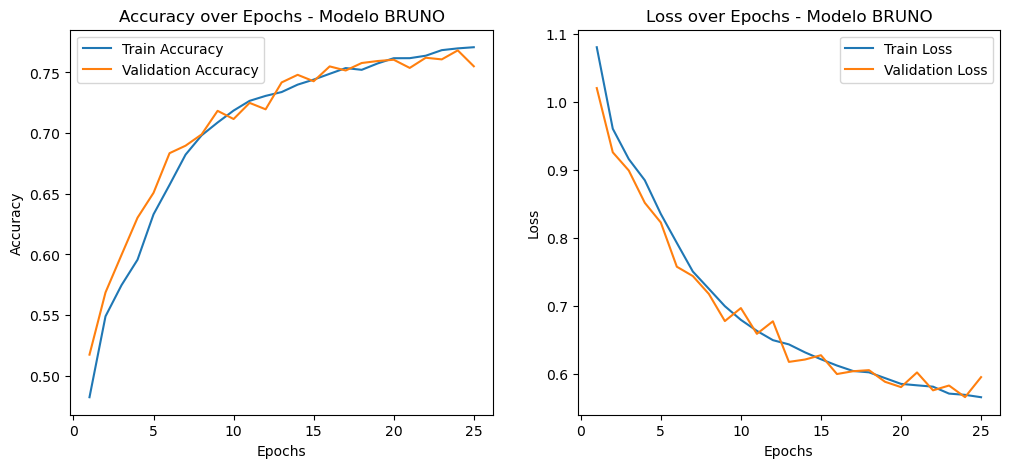

In [4]:
historial = 'modelo5_history.json'

with open(historial, 'r') as f:
    history = json.load(f)
    
if historial == 'modelo1_history.json':
    num_modelo = "1"
if historial == 'modelo2_history.json':
    num_modelo = "2"
if historial == 'modelo3_history.json':
    num_modelo = "3"
if historial== '100_modelo1_history.json':
    num_modelo = "1 Mejorado"
if historial== 'modelo_FINAL_history.json':
    num_modelo = "DATA CORREGIDA"
if historial== 'modelo5_history.json':
    num_modelo = "BRUNO"

epochs = range(1, len(history['accuracy']) + 1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history['accuracy'], label='Train Accuracy')
plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(f"Accuracy over Epochs - Modelo {num_modelo}")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history['loss'], label='Train Loss')
plt.plot(epochs, history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f"Loss over Epochs - Modelo {num_modelo}")
plt.legend()

plt.show()

## GRAFICA DE MODELO1 (100 EPOCAS)
### En caso de tener problemas con el graficador inicial

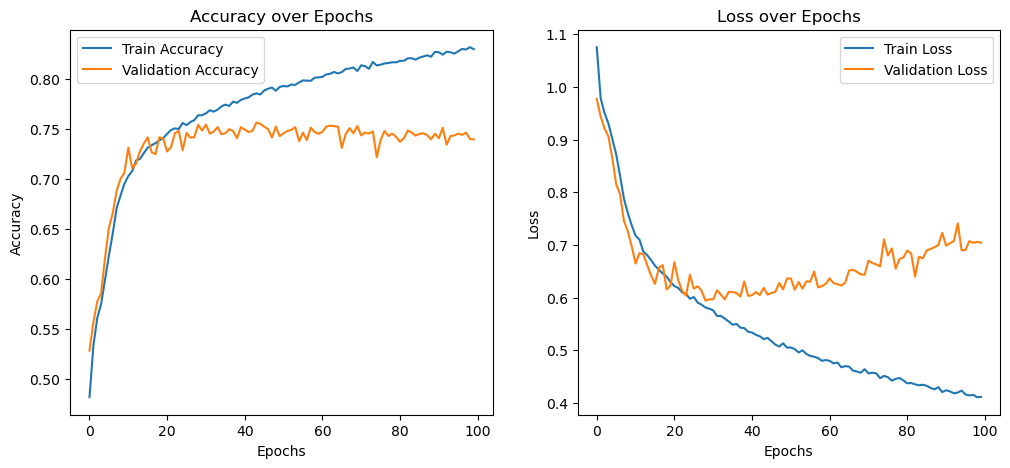

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('100_history.csv')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(df['accuracy'], label='Train Accuracy')
plt.plot(df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df['loss'], label='Train Loss')
plt.plot(df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.legend()

plt.show()

## CARGAR EL MODELO

In [44]:
modelo = 'modelo_FINAL_full.h5'
model = tf.keras.models.load_model(modelo)

## MATRIZ DE CONFUSIÓN VALIDACIÓN

Found 10376 files belonging to 4 classes.


              precision    recall  f1-score   support

  elliptical       0.69      0.74      0.71      2594
     espiral       0.70      0.71      0.70      2594
   irregular       0.80      0.69      0.74      2594
      sphere       0.78      0.82      0.80      2594

    accuracy                           0.74     10376
   macro avg       0.74      0.74      0.74     10376
weighted avg       0.74      0.74      0.74     10376

El modelo es:  modelo_FINAL_full.h5


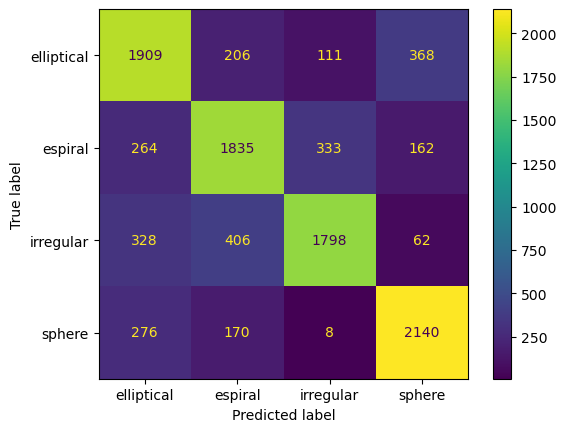

In [46]:
import sklearn.metrics
import tensorflow as tf
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report

val_ds = tf.keras.utils.image_dataset_from_directory(
    "val_set_corregido",
    image_size=(128, 128),
    batch_size=64,
    label_mode='categorical' 
)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

model = tf.keras.models.load_model(modelo)
y_true = []
y_pred = []

for images, labels in val_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))  
    predictions = model.predict(images, verbose=0)  
    y_pred.extend(np.argmax(predictions, axis=1))  

matriz_conf = sklearn.metrics.confusion_matrix(y_true,y_pred)
class_names = ['elliptical', 'espiral', 'irregular', 'sphere'] 
vis = sklearn.metrics.ConfusionMatrixDisplay(matriz_conf, display_labels=class_names)
vis.plot()
print(classification_report(y_true, y_pred, target_names=class_names))
print("El modelo es: ", modelo)

## APLICACIÓN DEL MODELO

In [47]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    "test_corregido", 
    image_size=(128, 128),
    batch_size=64,
    label_mode='categorical'  
)

test_ds = test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
test_loss, test_acc = model.evaluate(test_ds)
print("El modelo es: ", modelo)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Found 10380 files belonging to 4 classes.
163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.7455 - loss: 0.6239
El modelo es:  modelo_FINAL_full.h5
Test Accuracy: 0.7394
Test Loss: 0.6404


## MATRIZ DE CONFUSIÓN TESTEO

El modelo es:  modelo5_full.h5
              precision    recall  f1-score   support

  elliptical       0.73      0.76      0.75      2595
     espiral       0.70      0.74      0.72      2595
   irregular       0.81      0.65      0.72      2595
      sphere       0.81      0.89      0.85      2595

    accuracy                           0.76     10380
   macro avg       0.76      0.76      0.76     10380
weighted avg       0.76      0.76      0.76     10380



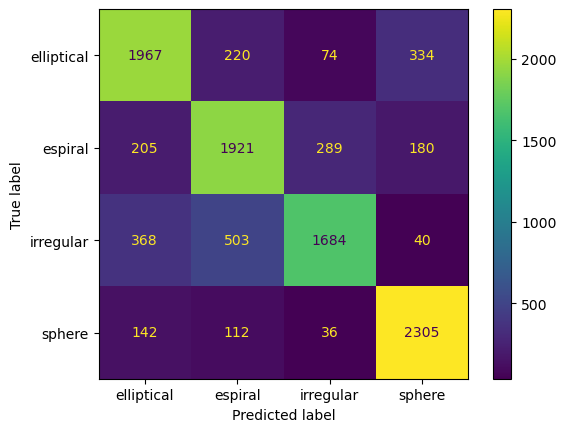

In [36]:
y_true = []
y_pred = []

for images, labels in test_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))  
    predictions = model.predict(images, verbose=0)  
    y_pred.extend(np.argmax(predictions, axis=1))  

matriz_conf = sklearn.metrics.confusion_matrix(y_true,y_pred)
class_names = ['elliptical', 'espiral', 'irregular', 'sphere'] 
vis = sklearn.metrics.ConfusionMatrixDisplay(matriz_conf, display_labels=class_names)
vis.plot()
print("El modelo es: ", modelo)
print(classification_report(y_true, y_pred, target_names=class_names))

# CLASIFICADOR FINAL

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


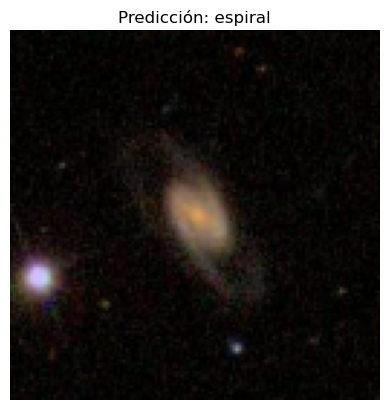

Predicciones (porcentaje por clase): [0.35236374 0.5551561  0.09133691 0.00114318]
Clase predicha: espiral


In [42]:
class_names = ['elliptical', 'espiral', 'irregular', 'sphere']  
model = tf.keras.models.load_model("modelo_FINAL_full.h5")

#image_path = r"C:\Users\PC\OneDrive\Escritorio\PUCP\2025-0\DEEP LEARNING\PROYECTO\MODELO\Galaxy Classifier\test_corregido\irregular\273450.jpg"
#image_path = r"C:\Users\PC\OneDrive\Escritorio\PUCP\2025-0\DEEP LEARNING\PROYECTO\MODELO\Galaxy Classifier\test_corregido\sphere\105984.jpg"
#image_path = r"C:\Users\PC\OneDrive\Escritorio\PUCP\2025-0\DEEP LEARNING\PROYECTO\MODELO\Galaxy Classifier\test_corregido\elliptical\156214.jpg"
image_path = r"C:\Users\PC\OneDrive\Escritorio\PUCP\2025-0\DEEP LEARNING\PROYECTO\MODELO\Galaxy Classifier\test_corregido\espiral\326539.jpg"

img = load_img(image_path, target_size=(128, 128))  
img_array = np.expand_dims(img_to_array(img), axis=0) 

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
predicted_label = class_names[predicted_class]

plt.imshow(img)
plt.title(f"Predicción: {predicted_label}")
plt.axis("off")
plt.show()

print(f"Predicciones (porcentaje por clase): {predictions[0]}")
print(f"Clase predicha: {predicted_label}")

## MODELO 4 (MODELO FINAL CON CORRECCIONES)

In [4]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(GlobalAveragePooling2D())  

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 124, 124, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,324 (118.45 KB)

 Trainable params: 30,324 (118.45 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "training_set_corregido",
    image_size=(128, 128),
    batch_size=64,
    label_mode='categorical'  
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "val_set_corregido",
    image_size=(128, 128),
    batch_size=64,
    label_mode='categorical' 
)

train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

classifier = model.fit(
    train_ds,
    epochs=25,
    validation_data=val_ds
)

print("Modelo entrenado")
model.save('modelo_FINAL_full.h5')
with open('modelo_FINAL_history.json', 'w') as f:
    json.dump(classifier.history, f)

Found 48424 files belonging to 4 classes.
Found 10376 files belonging to 4 classes.
Epoch 1/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 179s 234ms/step - accuracy: 0.4026 - loss: 1.2939 - val_accuracy: 0.5083 - val_loss: 1.0413
Epoch 2/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 155s 205ms/step - accuracy: 0.5036 - loss: 1.0267 - val_accuracy: 0.5247 - val_loss: 0.9719
Epoch 3/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 151s 199ms/step - accuracy: 0.5334 - loss: 0.9848 - val_accuracy: 0.5695 - val_loss: 0.9432
Epoch 4/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 152s 200ms/step - accuracy: 0.5506 - loss: 0.9620 - val_accuracy: 0.5576 - val_loss: 0.9419
Epoch 5/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 155s 205ms/step - accuracy: 0.5640 - loss: 0.9406 - val_accuracy: 0.5789 - val_loss: 0.9168
Epoch 6/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 156s 206ms/step - accuracy: 0.5766 - loss: 0.9295 - val_accuracy: 0.5927 - val_loss: 0.9099
Epoch 7/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 156s 206ms/step - accuracy: 0.5851 - loss: 0.9170 - val_accuracy: 0.6020 - val_loss:

Modelo entrenado


## MODELO 5 (MODIFICACIÓN MIA DEL MODELO 1 CON DATA MEJORADA)

In [6]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25)) 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25)) 
model.add(GlobalAveragePooling2D())  

model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 124, 124, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,324 (118.45 KB)

 Trainable params: 30,324 (118.45 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "training_set_corregido",
    image_size=(128, 128),
    batch_size=64,
    label_mode='categorical'  
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "val_set_corregido",
    image_size=(128, 128),
    batch_size=64,
    label_mode='categorical' 
)

train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

classifier = model.fit(
    train_ds,
    epochs=25,
    validation_data=val_ds
)

print("Modelo entrenado")
model.save('modelo5_full.h5')
with open('modelo5_history.json', 'w') as f:
    json.dump(classifier.history, f)

Found 48424 files belonging to 4 classes.
Found 10376 files belonging to 4 classes.
Epoch 1/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 248s 321ms/step - accuracy: 0.4442 - loss: 1.1568 - val_accuracy: 0.5174 - val_loss: 1.0202
Epoch 2/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 194s 256ms/step - accuracy: 0.5457 - loss: 0.9687 - val_accuracy: 0.5687 - val_loss: 0.9258
Epoch 3/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 193s 254ms/step - accuracy: 0.5715 - loss: 0.9206 - val_accuracy: 0.5997 - val_loss: 0.8990
Epoch 4/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 182s 241ms/step - accuracy: 0.5889 - loss: 0.8936 - val_accuracy: 0.6303 - val_loss: 0.8516
Epoch 5/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 164s 217ms/step - accuracy: 0.6290 - loss: 0.8447 - val_accuracy: 0.6508 - val_loss: 0.8226
Epoch 6/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 155s 204ms/step - accuracy: 0.6545 - loss: 0.7990 - val_accuracy: 0.6835 - val_loss: 0.7577
Epoch 7/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 159s 210ms/step - accuracy: 0.6797 - loss: 0.7549 - val_accuracy: 0.6897 - val_loss:

Modelo entrenado
